# Business Case: OLA - Ensemble Learning

Submitted by:- Deepali Gupta

Problem Statement:
The high churn rate among drivers poses a significant challenge for Ola, with drivers frequently leaving the service for competitors like Uber or ceasing to work altogether. This trend not only impacts the company's operational efficiency but also results in substantial financial losses due to the high costs associated with acquiring new drivers. As Ola continues to expand its operations, the issue of driver attrition threatens to escalate, exacerbating the strain on resources and undermining organizational morale.

To address this challenge, the Analytics Department at Ola aims to develop predictive models leveraging demographic, tenure, and performance data to forecast driver attrition accurately. By analyzing historical information on drivers' attributes such as city, age, gender, tenure, performance ratings, business acquired, income, and other relevant factors, the goal is to identify key drivers of churn and develop strategies to mitigate it effectively. Through data-driven insights, Ola seeks to optimize its driver retention efforts, minimize operational disruptions, and enhance overall organizational sustainability.`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from matplotlib.font_manager import FontProperties
from scipy.stats.mstats import winsorize
import copy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE



from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE
import xgboost as xgb

In [2]:
df=pd.read_csv('ola_driver_scaler.csv')

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [7]:
df.shape

(19104, 13)

In [8]:
df.head(10)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
5,12/01/19,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,12/07/19,NaN,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,12/07/19,27/04/20,2,2,0,1


In [9]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [11]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [12]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [13]:
df.loc[df['Age'].isna()]

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
72,02/01/20,20,NaN,1.0,C19,0,40342,25/10/19,NaN,3,3,0,1
97,10/01/19,22,NaN,0.0,C10,2,31224,25/05/18,NaN,1,1,200000,3
110,07/01/19,24,NaN,0.0,C24,2,76308,25/05/18,NaN,1,2,203240,3
212,11/01/19,40,NaN,0.0,C15,0,59182,11/08/19,NaN,2,2,0,1
261,05/01/19,49,NaN,0.0,C20,0,53039,25/05/18,NaN,1,2,124190,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18395,05/01/20,2690,NaN,0.0,C11,2,77662,17/07/18,NaN,1,2,692600,4
18722,08/01/20,2730,NaN,1.0,C16,2,69924,07/08/19,NaN,2,2,161860,2
18780,03/01/19,2738,NaN,0.0,C17,0,23068,09/08/18,NaN,1,1,639780,3
18843,01/01/19,2751,NaN,0.0,C17,2,53115,11/05/15,NaN,1,1,506550,3


In [14]:
df_agg = df.groupby("Driver_ID").agg(
    Age=('Age', lambda x : x.median()),
    Gender=('Gender', lambda x : x.mode()),
    City=('City', lambda x : x.mode()),
    EducationLevel=('Education_Level', np.median),
    MeanIncome=('Income', np.mean),
    JoiningDate=('Dateofjoining', 'first'),
    LastWorkingDate = ('LastWorkingDate', 'last'),
    JoiningDesignation = ('Joining Designation', 'first'),
    Last_Grade = ('Grade', 'last'),
    TotalBusinessValue = ('Total Business Value', np.sum),
    QtrlyRating = ('Quarterly Rating', lambda x : max(x.mode()))
).reset_index()

In [15]:
df_agg

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,03/11/19,1,1,1715580,2
1,2,31.0,0.0,C7,2.0,67016.0,11/06/20,None,2,2,0,1
2,4,43.0,0.0,C13,2.0,65603.0,12/07/19,27/04/20,2,2,350000,1
3,5,29.0,0.0,C9,0.0,46368.0,01/09/19,03/07/19,1,1,120360,1
4,6,31.0,1.0,C11,1.0,78728.0,31/07/20,None,3,3,1265000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.5,0.0,C24,0.0,82815.0,15/10/15,None,2,3,21748820,3
2377,2785,34.0,1.0,C9,0.0,12105.0,28/08/20,28/10/20,1,1,0,1
2378,2786,45.0,0.0,C19,0.0,35370.0,31/07/18,22/09/19,2,2,2815090,2
2379,2787,28.0,1.0,C20,2.0,69498.0,21/07/18,20/06/19,1,1,977830,2


In [16]:
df_agg.isna().sum()

Driver_ID               0
Age                     0
Gender                  0
City                    0
EducationLevel          0
MeanIncome              0
JoiningDate             0
LastWorkingDate       765
JoiningDesignation      0
Last_Grade              0
TotalBusinessValue      0
QtrlyRating             0
dtype: int64

In [17]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [18]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver_ID           2381 non-null   int64  
 1   Age                 2381 non-null   float64
 2   Gender              2381 non-null   float64
 3   City                2381 non-null   object 
 4   EducationLevel      2381 non-null   float64
 5   MeanIncome          2381 non-null   float64
 6   JoiningDate         2381 non-null   object 
 7   LastWorkingDate     1616 non-null   object 
 8   JoiningDesignation  2381 non-null   int64  
 9   Last_Grade          2381 non-null   int64  
 10  TotalBusinessValue  2381 non-null   int64  
 11  QtrlyRating         2381 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 223.3+ KB


In [19]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [20]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver_ID           2381 non-null   int64  
 1   Age                 2381 non-null   float64
 2   Gender              2381 non-null   float64
 3   City                2381 non-null   object 
 4   EducationLevel      2381 non-null   float64
 5   MeanIncome          2381 non-null   float64
 6   JoiningDate         2381 non-null   object 
 7   LastWorkingDate     1616 non-null   object 
 8   JoiningDesignation  2381 non-null   int64  
 9   Last_Grade          2381 non-null   int64  
 10  TotalBusinessValue  2381 non-null   int64  
 11  QtrlyRating         2381 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 223.3+ KB


Percentage of null values present in the datase

In [21]:
df_agg.isnull().sum()*100/len(df)

Driver_ID             0.000000
Age                   0.000000
Gender                0.000000
City                  0.000000
EducationLevel        0.000000
MeanIncome            0.000000
JoiningDate           0.000000
LastWorkingDate       4.004397
JoiningDesignation    0.000000
Last_Grade            0.000000
TotalBusinessValue    0.000000
QtrlyRating           0.000000
dtype: float64

**Featuring and Data Visualisation**

In [22]:
df_agg['churn']=df_agg['LastWorkingDate'].apply(lambda x:1 if pd.isnull(x) else 0)

In [23]:
df_agg

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,03/11/19,1,1,1715580,2,0
1,2,31.0,0.0,C7,2.0,67016.0,11/06/20,None,2,2,0,1,1
2,4,43.0,0.0,C13,2.0,65603.0,12/07/19,27/04/20,2,2,350000,1,0
3,5,29.0,0.0,C9,0.0,46368.0,01/09/19,03/07/19,1,1,120360,1,0
4,6,31.0,1.0,C11,1.0,78728.0,31/07/20,None,3,3,1265000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.5,0.0,C24,0.0,82815.0,15/10/15,None,2,3,21748820,3,1
2377,2785,34.0,1.0,C9,0.0,12105.0,28/08/20,28/10/20,1,1,0,1,0
2378,2786,45.0,0.0,C19,0.0,35370.0,31/07/18,22/09/19,2,2,2815090,2,0
2379,2787,28.0,1.0,C20,2.0,69498.0,21/07/18,20/06/19,1,1,977830,2,0


In [24]:
df.head(1)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2


In [25]:
ola=df_agg['churn'].value_counts().reset_index().rename(columns={'churn':'Count','index':'churn'})

In [26]:
df_agg.insert(
    loc = df_agg.columns.get_loc("JoiningDate")+1,
    column = "JoiningQuarter",
    value = pd.to_datetime(df["Dateofjoining"]).dt.quarter.map({1:"Q1", 2:"Q2", 3:"Q3", 4:"Q4"})
)

df_agg.insert(
    loc = df_agg.columns.get_loc("JoiningDate")+1,
    column = "JoiningWeekDay",
    value = pd.to_datetime(df["Dateofjoining"]).dt.strftime('%a')
)

df_agg.insert(
    loc = df_agg.columns.get_loc("JoiningDate")+1,
    column = "JoiningYear",
    value = pd.to_datetime(df_agg["JoiningDate"]).dt.year
)

df_agg.insert(
    loc = df_agg.columns.get_loc("JoiningDate")+1,
    column = "JoiningMonth",
    value = pd.to_datetime(df["Dateofjoining"]).dt.strftime('%b')
)

df_agg.insert(
    loc = df_agg.columns.get_loc("JoiningDate")+1,
    column = "JoiningDay",
    value = pd.to_datetime(df_agg["JoiningDate"]).dt.day
)

In [27]:
df_agg

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580,2,0
1,2,31.0,0.0,C7,2.0,67016.0,11/06/20,6,Dec,2020,Mon,Q4,None,2,2,0,1,1
2,4,43.0,0.0,C13,2.0,65603.0,12/07/19,7,Dec,2019,Mon,Q4,27/04/20,2,2,350000,1,0
3,5,29.0,0.0,C9,0.0,46368.0,01/09/19,9,Nov,2019,Fri,Q4,03/07/19,1,1,120360,1,0
4,6,31.0,1.0,C11,1.0,78728.0,31/07/20,31,Nov,2020,Fri,Q4,None,3,3,1265000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.5,0.0,C24,0.0,82815.0,15/10/15,15,Sep,2015,Tue,Q3,None,2,3,21748820,3,1
2377,2785,34.0,1.0,C9,0.0,12105.0,28/08/20,28,Sep,2020,Tue,Q3,28/10/20,1,1,0,1,0
2378,2786,45.0,0.0,C19,0.0,35370.0,31/07/18,31,Sep,2018,Tue,Q3,22/09/19,2,2,2815090,2,0
2379,2787,28.0,1.0,C20,2.0,69498.0,21/07/18,21,Sep,2018,Tue,Q3,20/06/19,1,1,977830,2,0


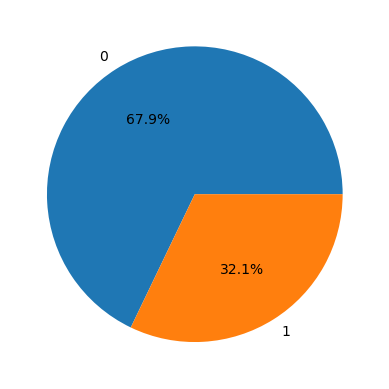

In [28]:
plt.pie(ola['Count'], labels= ola['churn'],autopct='%1.1f%%')
plt.show()

insight:Around 32% drivers left OLA, which is high lets find out the reason behind the case.

In [96]:
df_agg.head(1)

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580.0,2,0


findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.


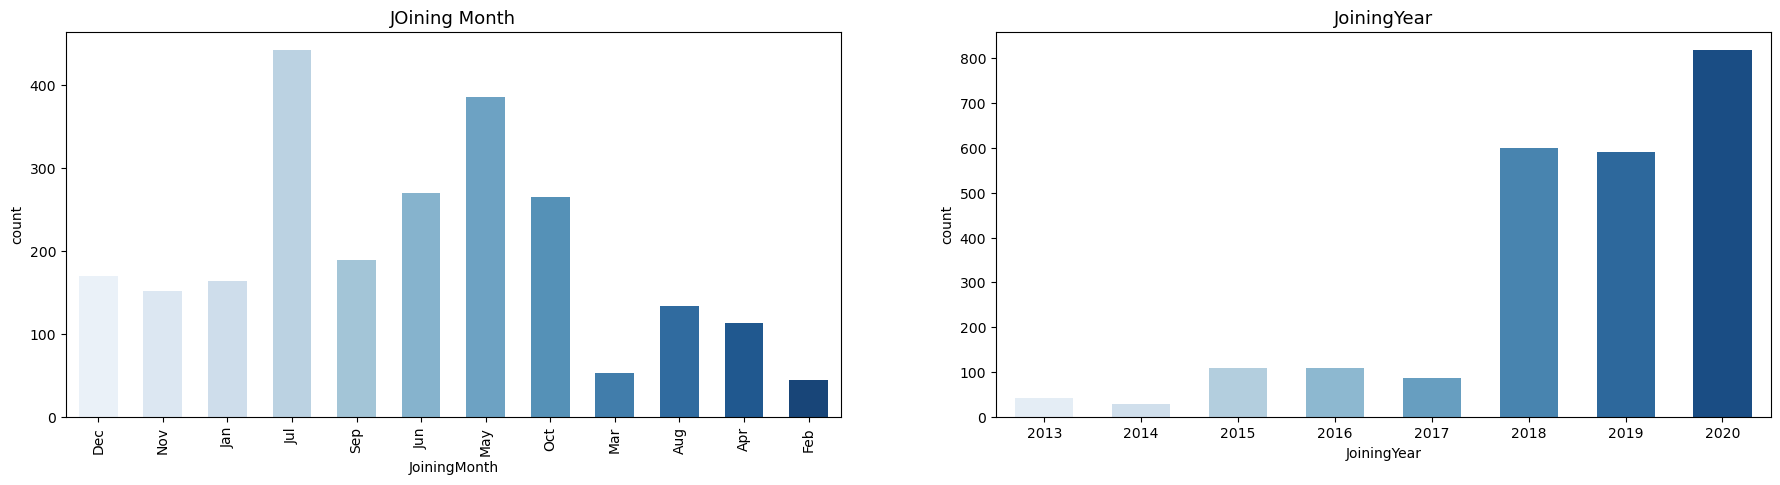

In [99]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=df_agg['JoiningMonth'],palette='Blues',width=0.6)
plt.title('JOining Month',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df_agg['JoiningYear'],palette="Blues",width=0.6)
plt.title('JoiningYear',fontname='Franklin Gothic Medium', fontsize=13)
          

plt.show()

#### Maximum drivers joined in the month of july followed by May.
#### Hiring Trend increases from 2018 and found maximum in 2020.

findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.


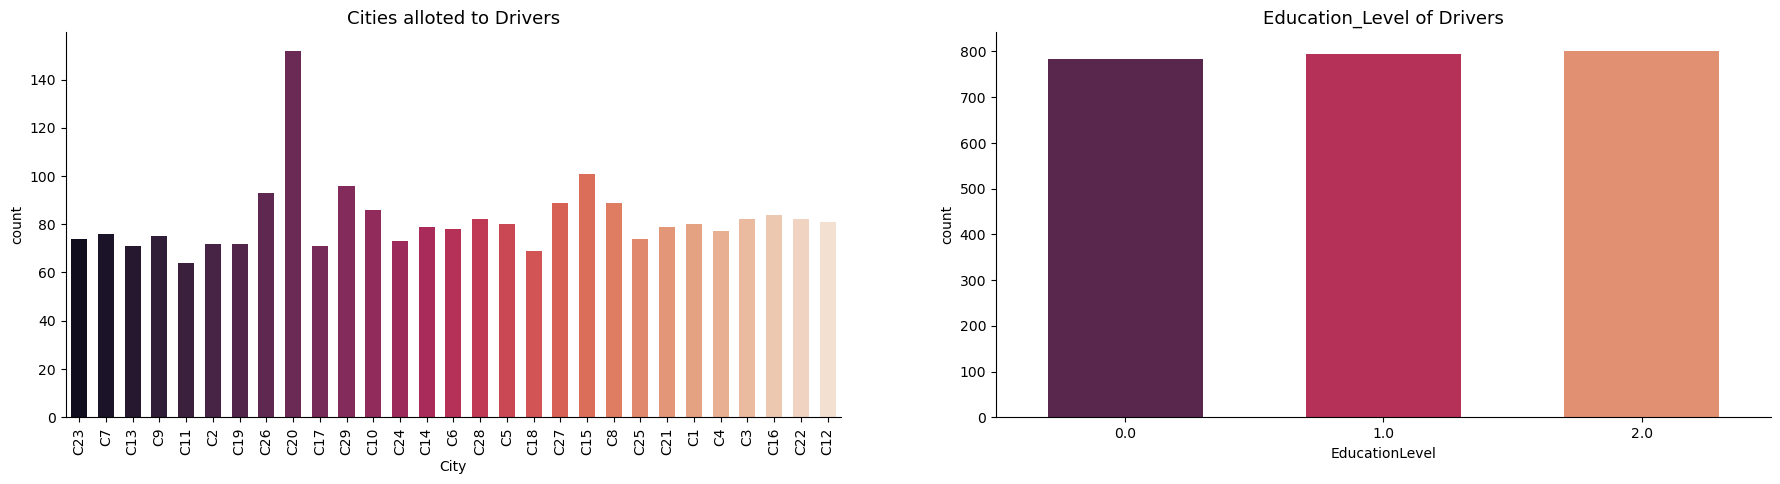

In [29]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=df_agg['City'],palette='rocket',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df_agg['EducationLevel'],palette='rocket',width=0.6)
plt.title('Education_Level of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
          
# ax = fig.add_subplot(133)
# sns.countplot(x=ola1.Education_Level,palette='viridis')
# plt.title('Educational Level of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
sns.despine()
plt.show()

#### C26 city has maximum drivers engaged.

<Axes: xlabel='Gender', ylabel='count'>

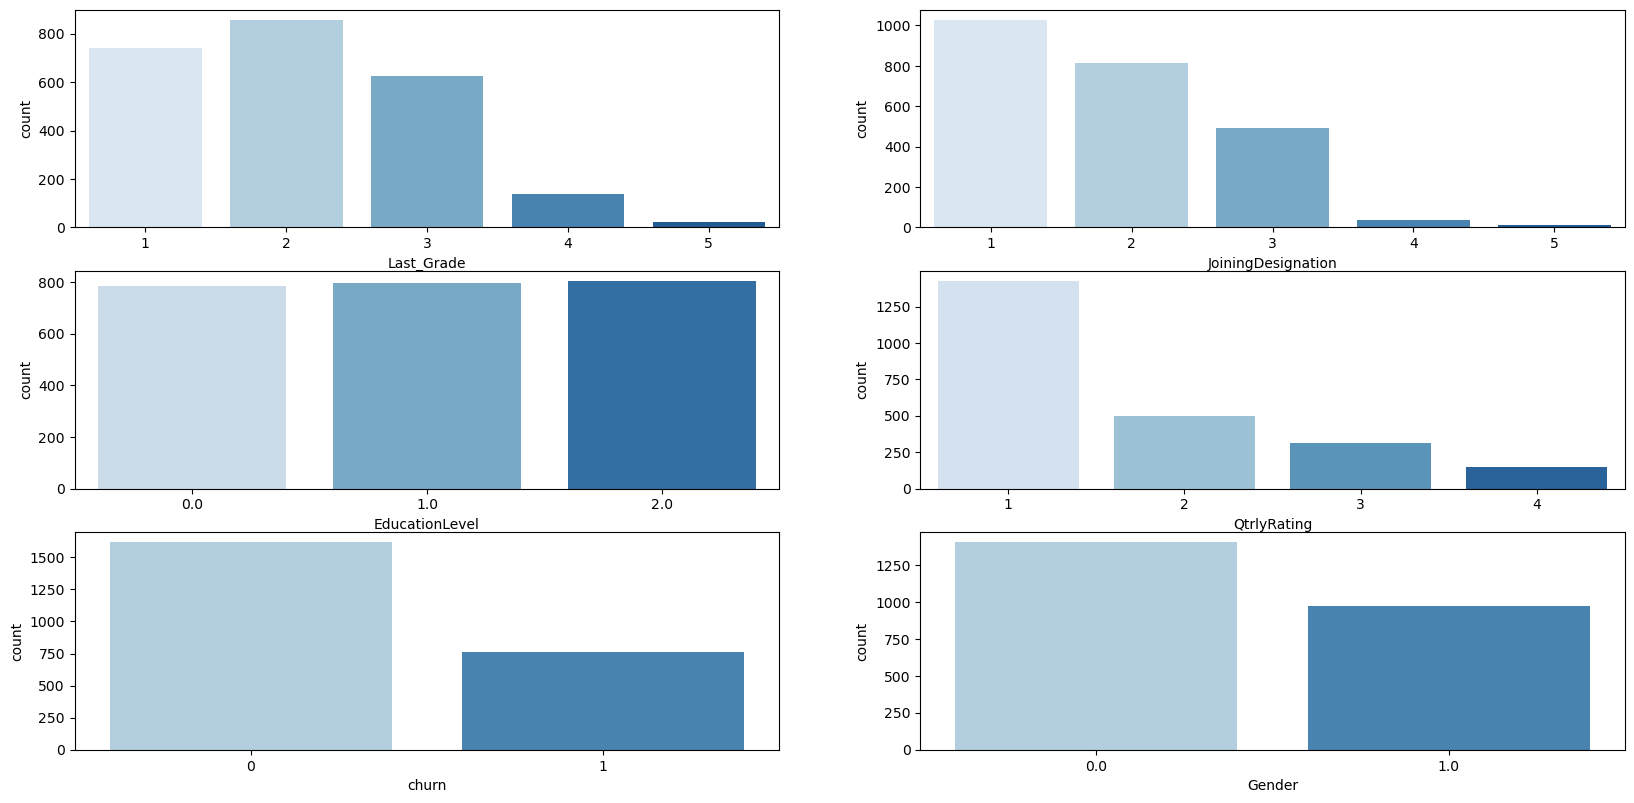

In [30]:
plt.figure(figsize=(20,13))
plt.subplot(4,2,1)
sns.countplot(x=df_agg['Last_Grade'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,2)
sns.countplot(x=df_agg['JoiningDesignation'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,3)
sns.countplot(x=df_agg['EducationLevel'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,4)
sns.countplot(x=df_agg['QtrlyRating'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,5)
sns.countplot(x=df_agg['churn'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(4,2,6)
sns.countplot(x=df_agg['Gender'],palette="Blues")
# plt.title('Grade given to different Drivers',fontname='Franklin Gothic Medium', fontsize=15)

In [31]:
df_agg.head(1)

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580,2,0


In [32]:
df_agg['Gender'].value_counts().reset_index()

,index,Gender
0,0.0,1404
1,1.0,977


insight:- Male Drivers are prominant than female drivers

**BIVARIATE AND MULTIVARIATE ANALYSIS**

findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.


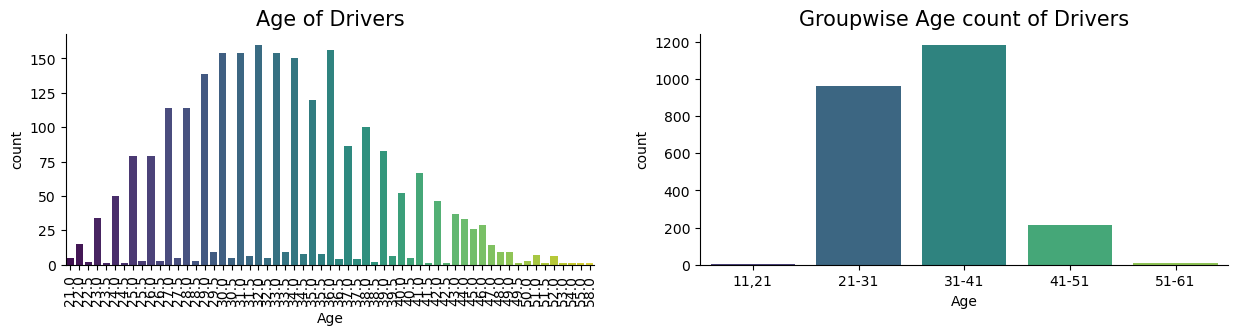

In [33]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(121)
sns.countplot(x=df_agg.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(df_agg.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers',fontname='Franklin Gothic Medium', fontsize=15)
sns.despine()
plt.show()

In [34]:
df_agg.head(1)

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580,2,0


findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.


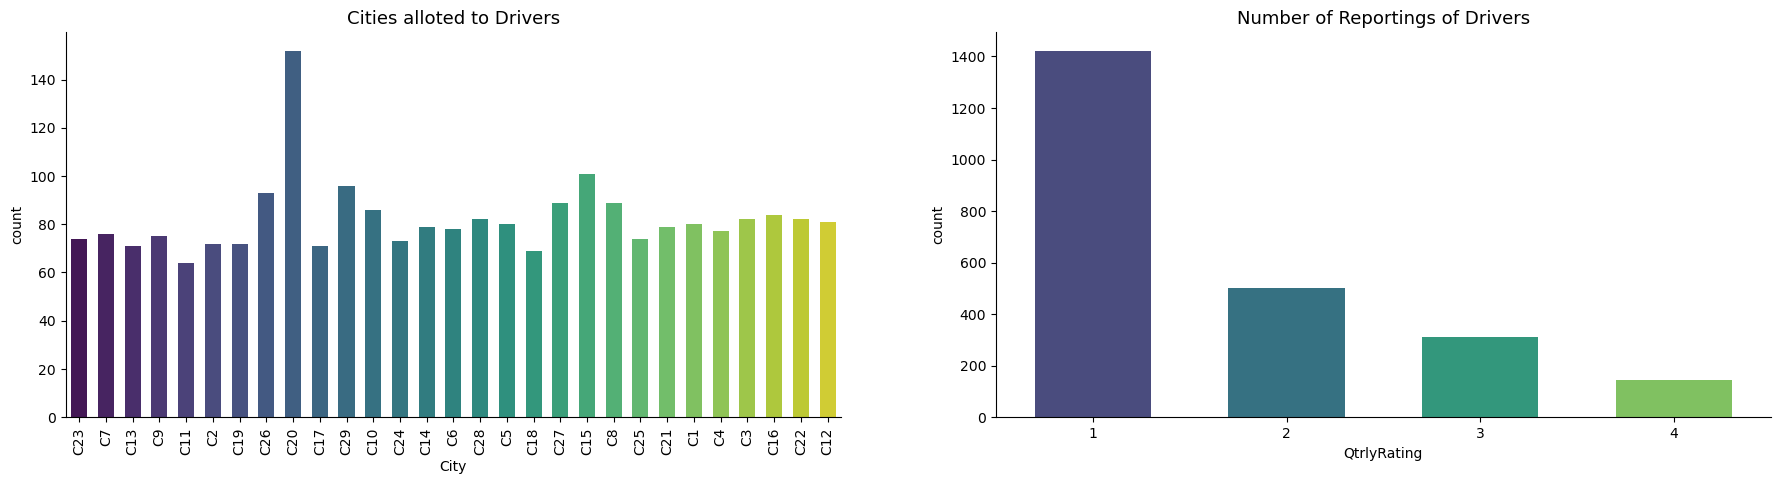

In [35]:
# figure3
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=df_agg.City,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers',fontname='Franklin Gothic Medium', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df_agg.QtrlyRating,palette='viridis',width=0.6)
plt.title('Number of Reportings of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
          
# ax = fig.add_subplot(133)
# sns.countplot(x=ola1.Education_Level,palette='viridis')
# plt.title('Educational Level of Drivers',fontname='Franklin Gothic Medium', fontsize=13)
sns.despine()
plt.show()

<Axes: xlabel='City', ylabel='count'>

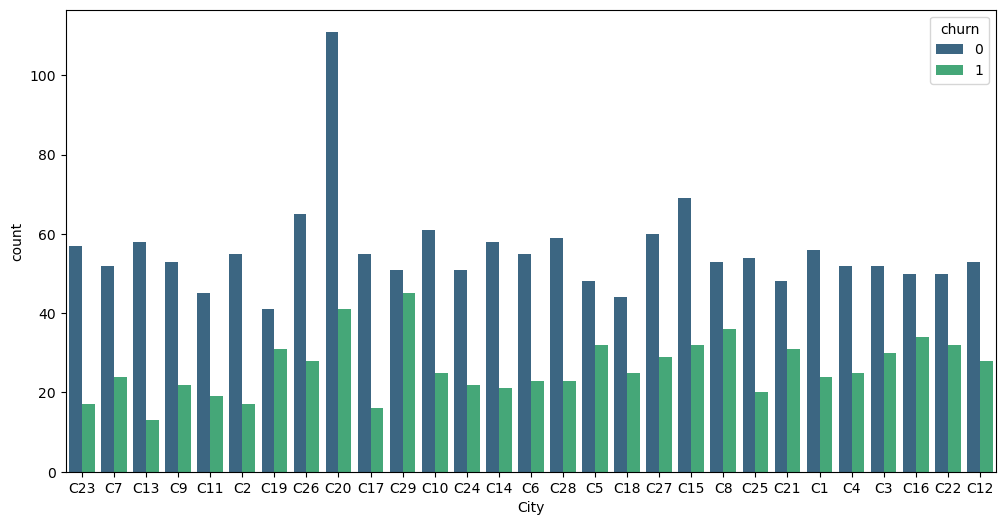

In [36]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_agg, x='City', hue='churn', palette='viridis')

<Axes: xlabel='EducationLevel', ylabel='Count'>

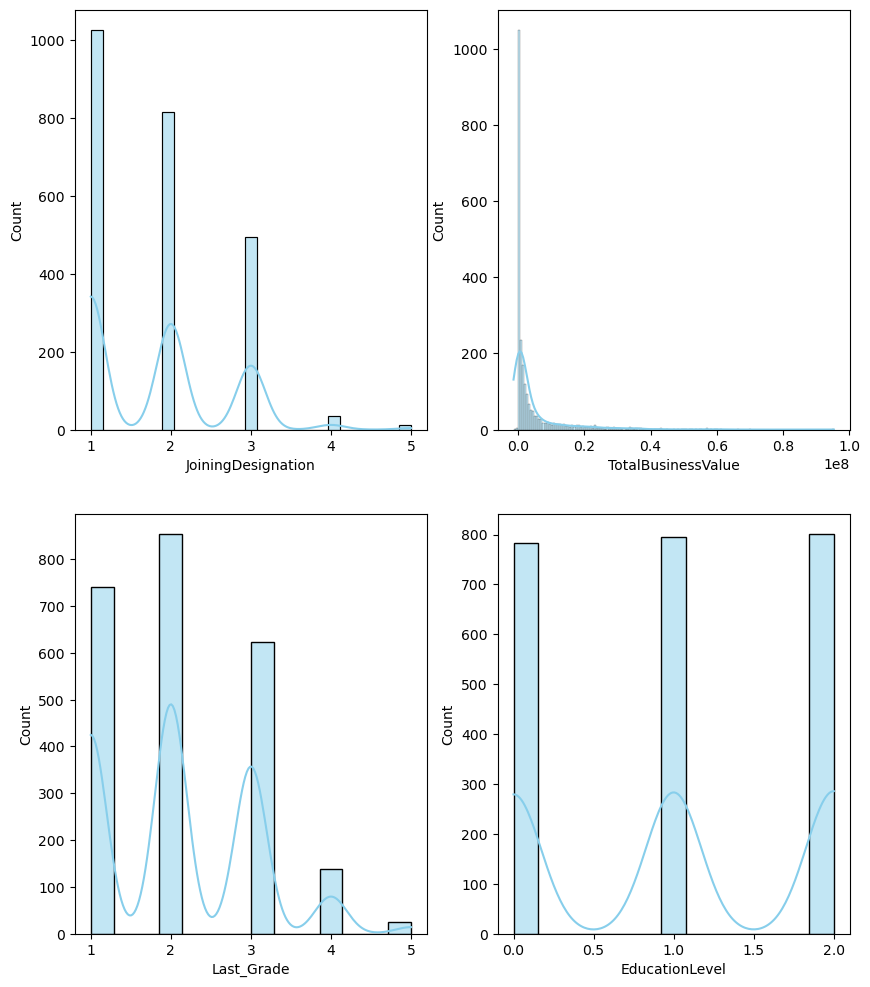

In [37]:
fig=plt.figure(figsize=(10,12))

plt.subplot(2,2,1)
sns.histplot(df_agg['JoiningDesignation'],kde=True,color='skyblue')

plt.subplot(2,2,2)
sns.histplot(df_agg['TotalBusinessValue'],kde=True,color='skyblue')

plt.subplot(2,2,3)
sns.histplot(df_agg['Last_Grade'],kde=True,color='skyblue')

plt.subplot(2,2,4)
sns.histplot(df_agg['EducationLevel'],kde=True,color='skyblue')

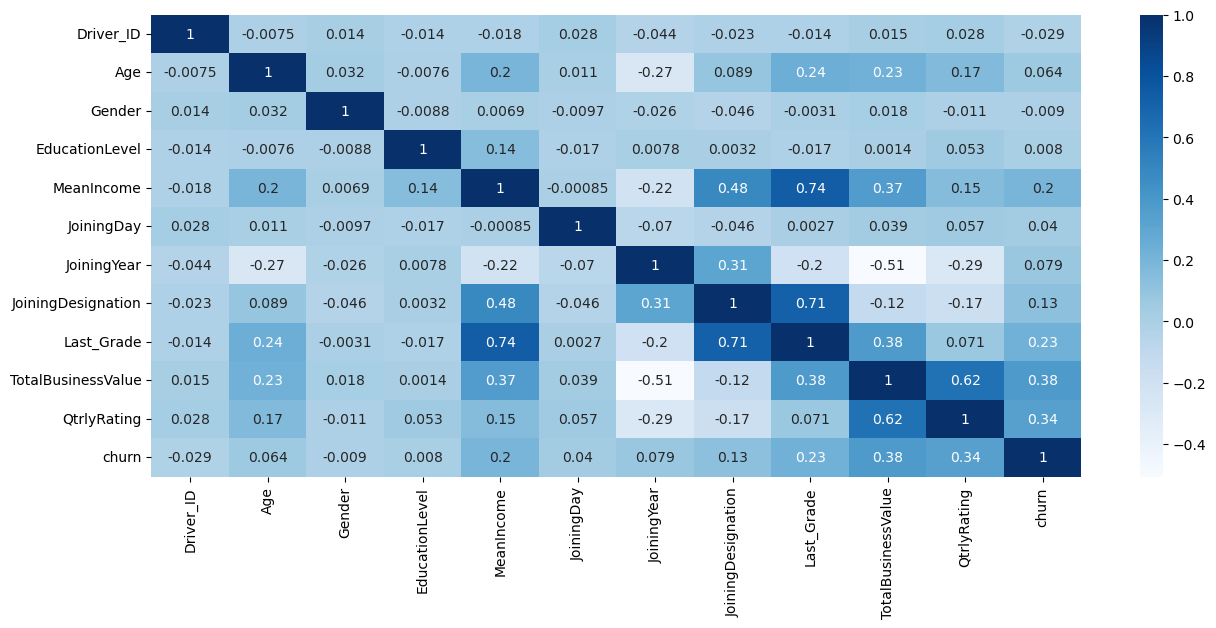

In [38]:
corr = df_agg.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Blues')
plt.show()

In [39]:
df_agg.head(1)

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580,2,0


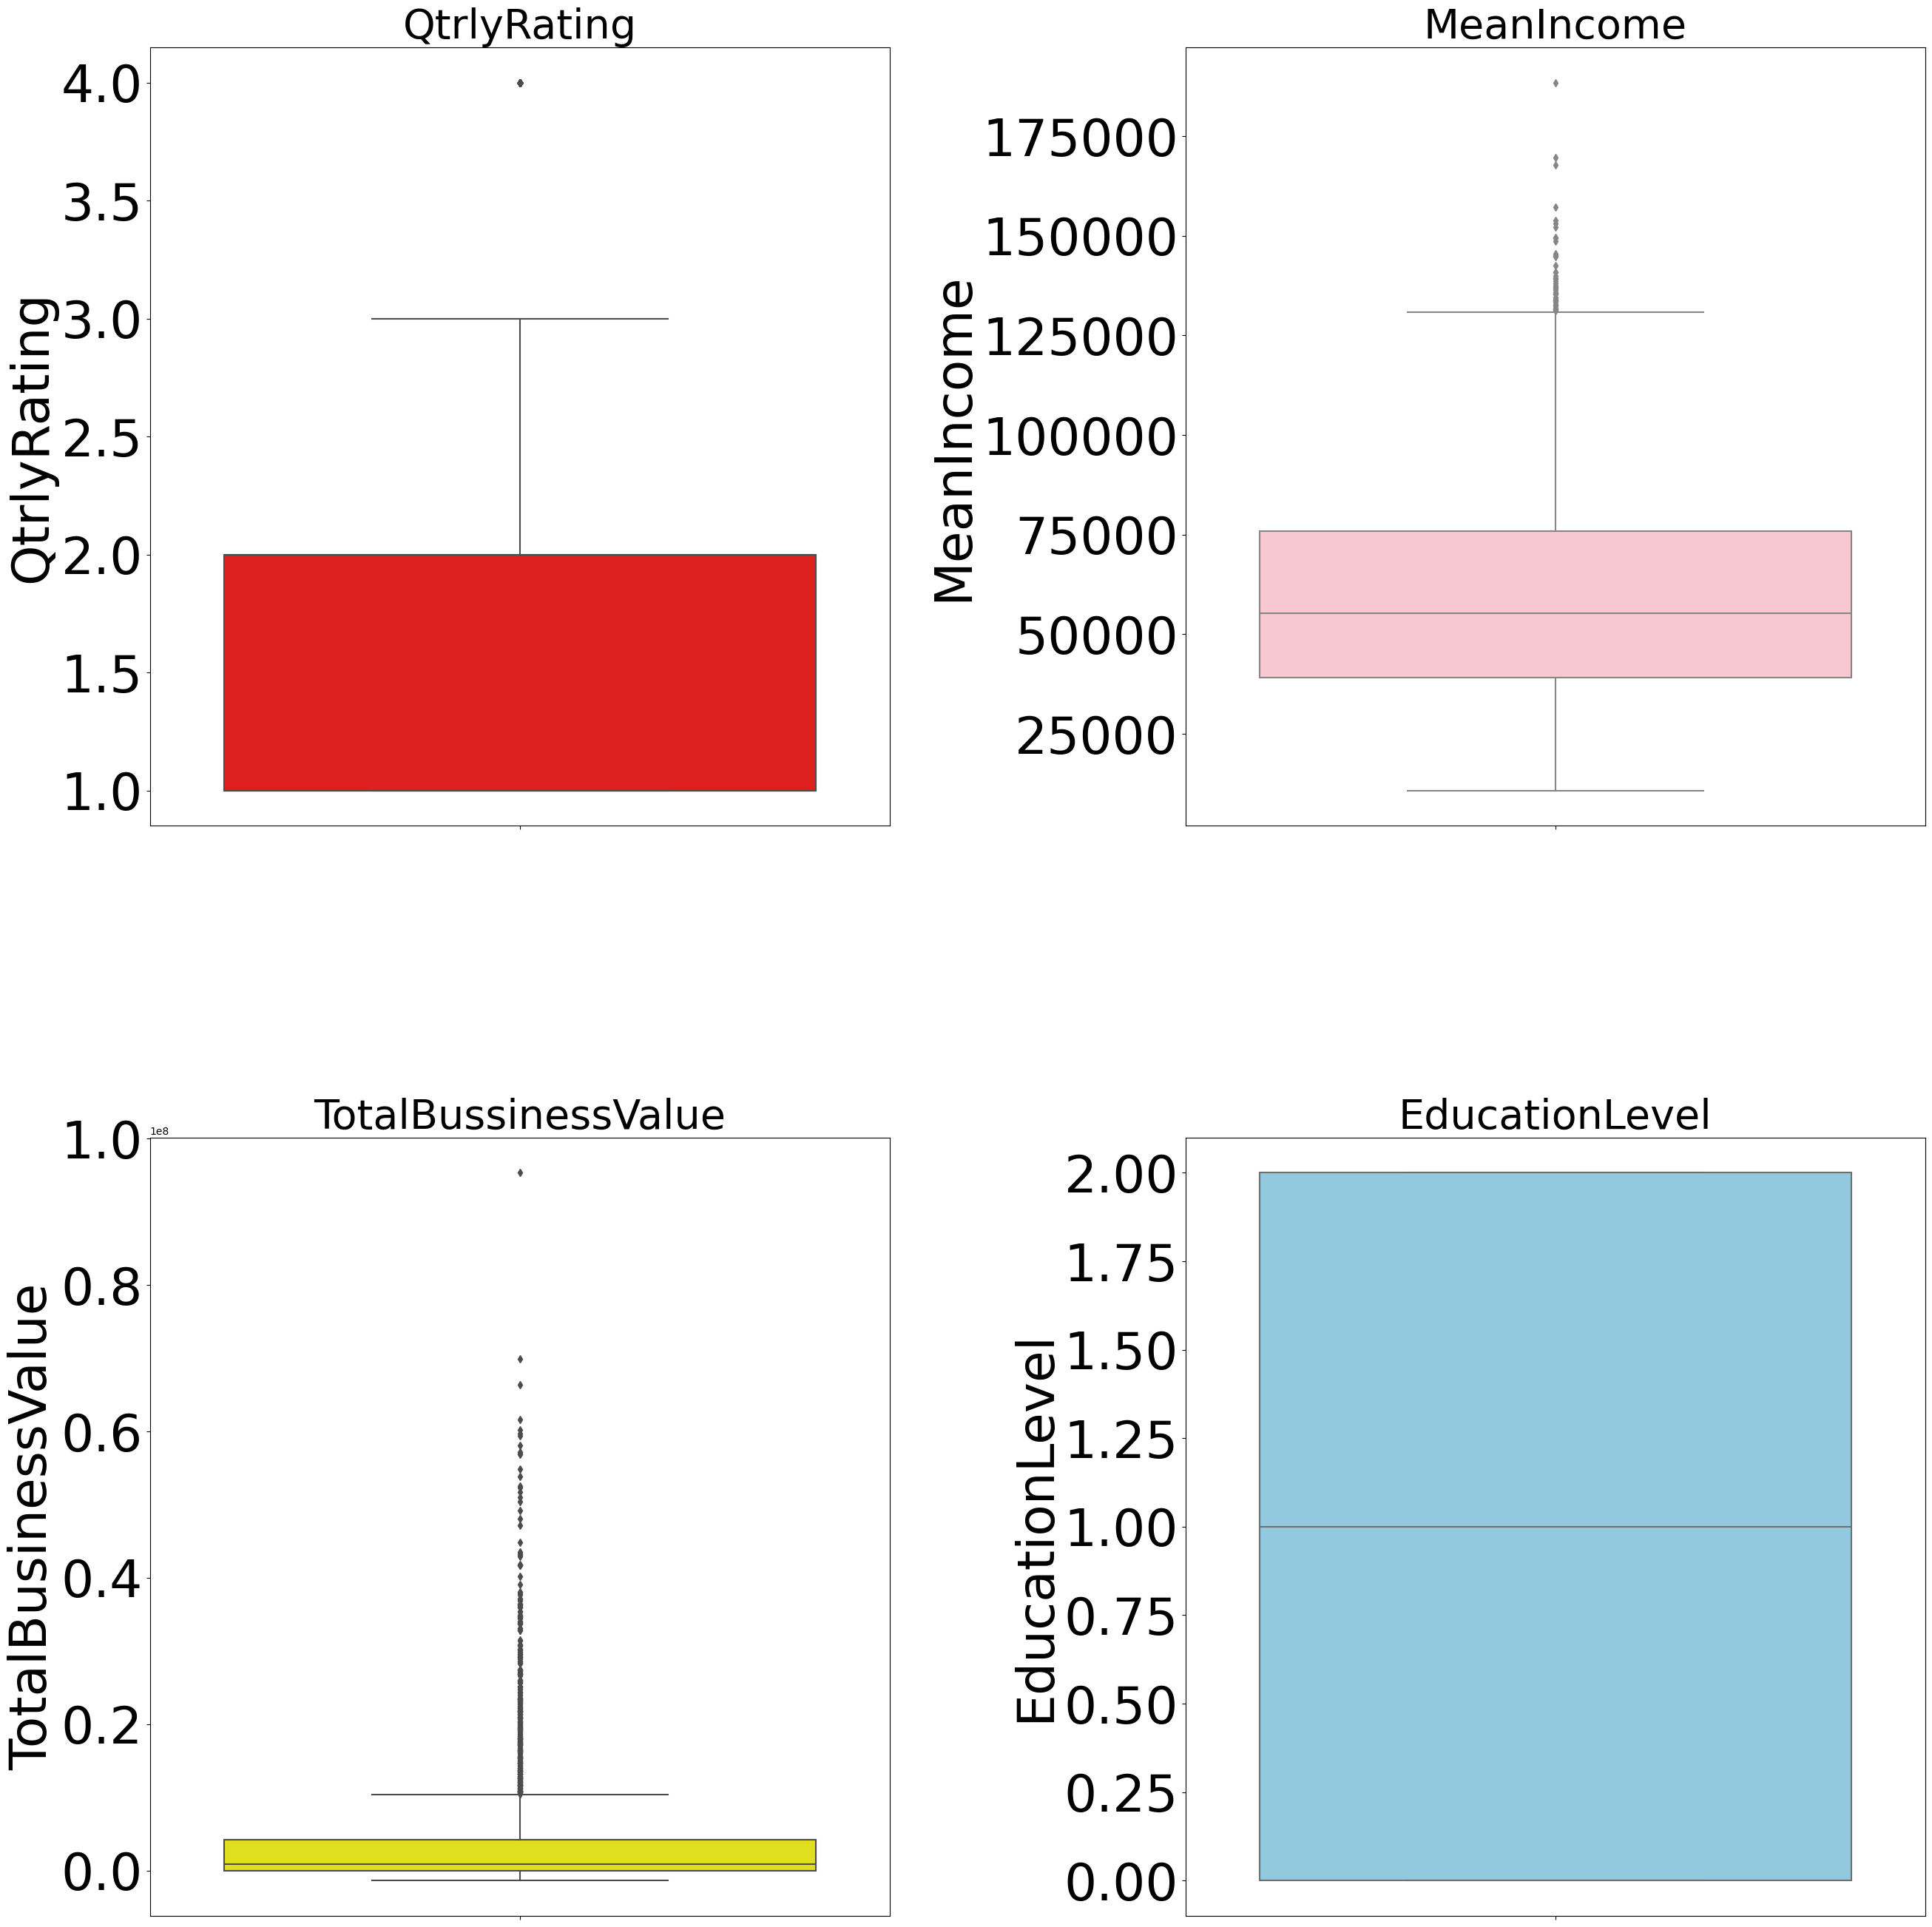

In [40]:
fig=plt.figure(figsize=(30,50))
plt.subplot(3,2,1)
plt.title('QtrlyRating',fontsize=40)
plt.yticks(fontsize = 50)
plt.ylabel('QtrlyRating',fontsize = 50)
sns.boxplot(y=df_agg['QtrlyRating'],color="red")
plt.subplot(3,2,2)
plt.title('MeanIncome',fontsize=40)
plt.yticks(fontsize = 50)
plt.ylabel('MeanIncome',fontsize = 50)
sns.boxplot(y=df_agg['MeanIncome'],color='pink')
plt.subplot(3,2,3)
plt.title('TotalBussinessValue',fontsize=40)
plt.yticks(fontsize = 50)
sns.boxplot(y=df_agg['TotalBusinessValue'],color='yellow')
plt.ylabel('TotalBusinessValue',fontsize = 50)
#plt.subplots_adjust(hspace=6)
plt.subplot(3,2,4)
plt.title('EducationLevel',fontsize=40)
plt.yticks(fontsize = 50)
sns.boxplot(y=df_agg['EducationLevel'],color="skyblue")
plt.ylabel('EducationLevel',fontsize = 50)




plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

**Outlier Treatment**

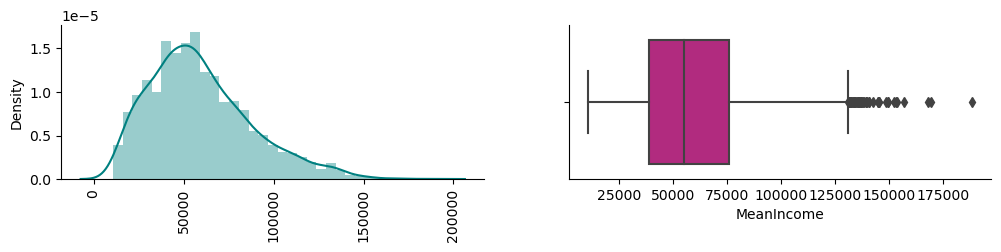

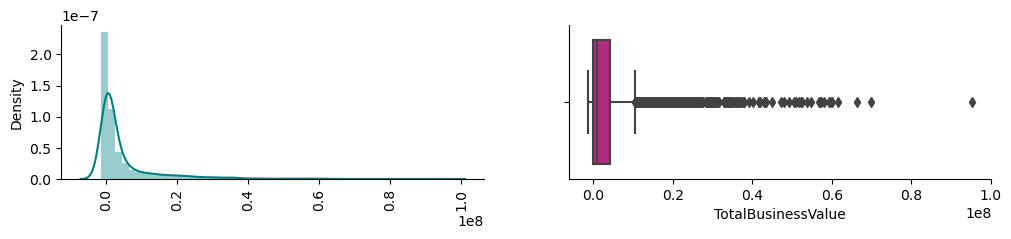

In [41]:
a =df_agg[['MeanIncome','TotalBusinessValue']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=df_agg[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df_agg[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

In [42]:
for col in ['MeanIncome', 'TotalBusinessValue']:
  std = df_agg[col].std()
  q1 = np.percentile(df_agg[col], 25)
  q2 = np.percentile(df_agg[col], 50)
  q3 = np.percentile(df_agg[col], 75)
  IQR = q3-q1
  lower_limt, upper_limit = q1-1.5*IQR , q3+1.5*IQR
  df_agg[col] = df_agg[col].apply(lambda x: lower_limt if x < lower_limt else x)
  df_agg[col] = df_agg[col].apply(lambda x: upper_limit if x > upper_limit else x)
df_agg.shape

(2381, 18)

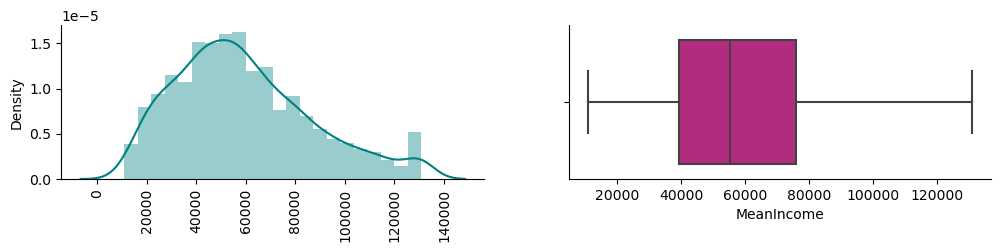

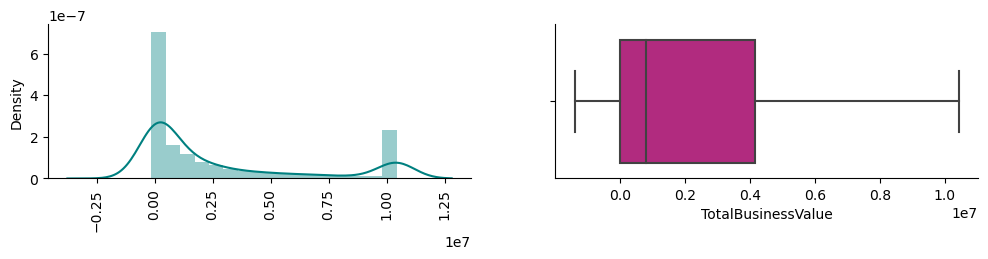

In [43]:
a =df_agg[['MeanIncome','TotalBusinessValue']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=df_agg[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df_agg[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()

<Axes: ylabel='Density'>

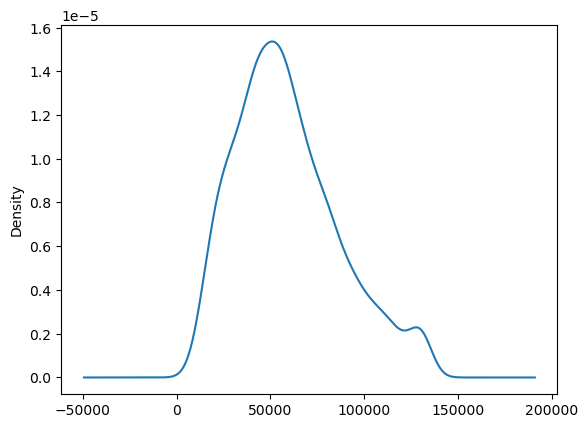

In [44]:
df_agg['MeanIncome'].plot.density()

<Axes: ylabel='Density'>

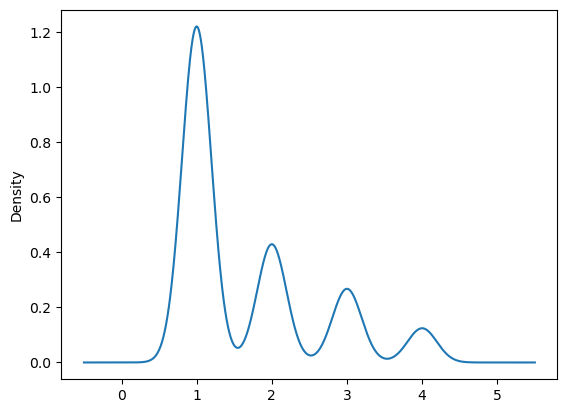

In [45]:
df_agg['QtrlyRating'].plot.density()

<Axes: ylabel='Density'>

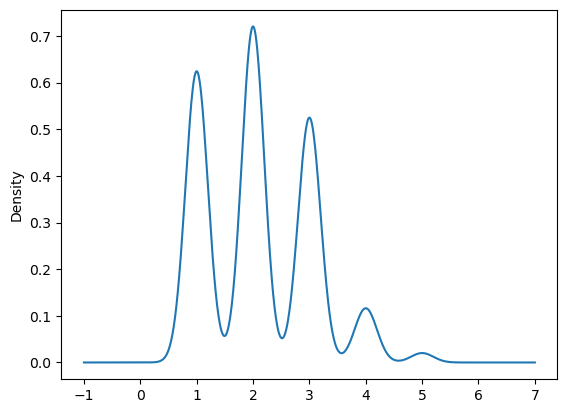

In [46]:
df_agg['Last_Grade'].plot.density()

<Axes: ylabel='Density'>

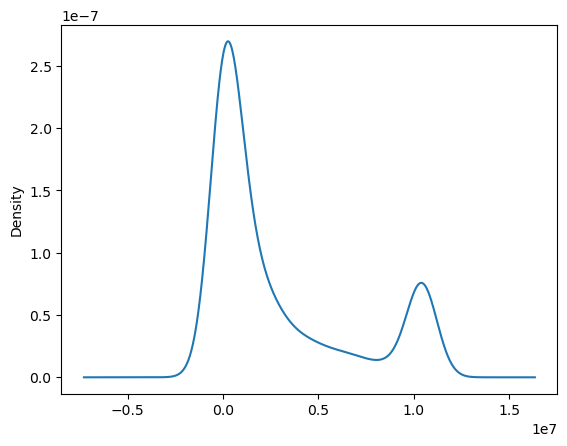

In [47]:
df_agg['TotalBusinessValue'].plot.density()

In [48]:
df_agg.head(1)

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDate,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,LastWorkingDate,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,1,28.0,0.0,C23,2.0,57387.0,24/12/18,24,Dec,2018,Mon,Q4,03/11/19,1,1,1715580.0,2,0


findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.
findfont: Font family 'Franklin Gothic Medium' not found.


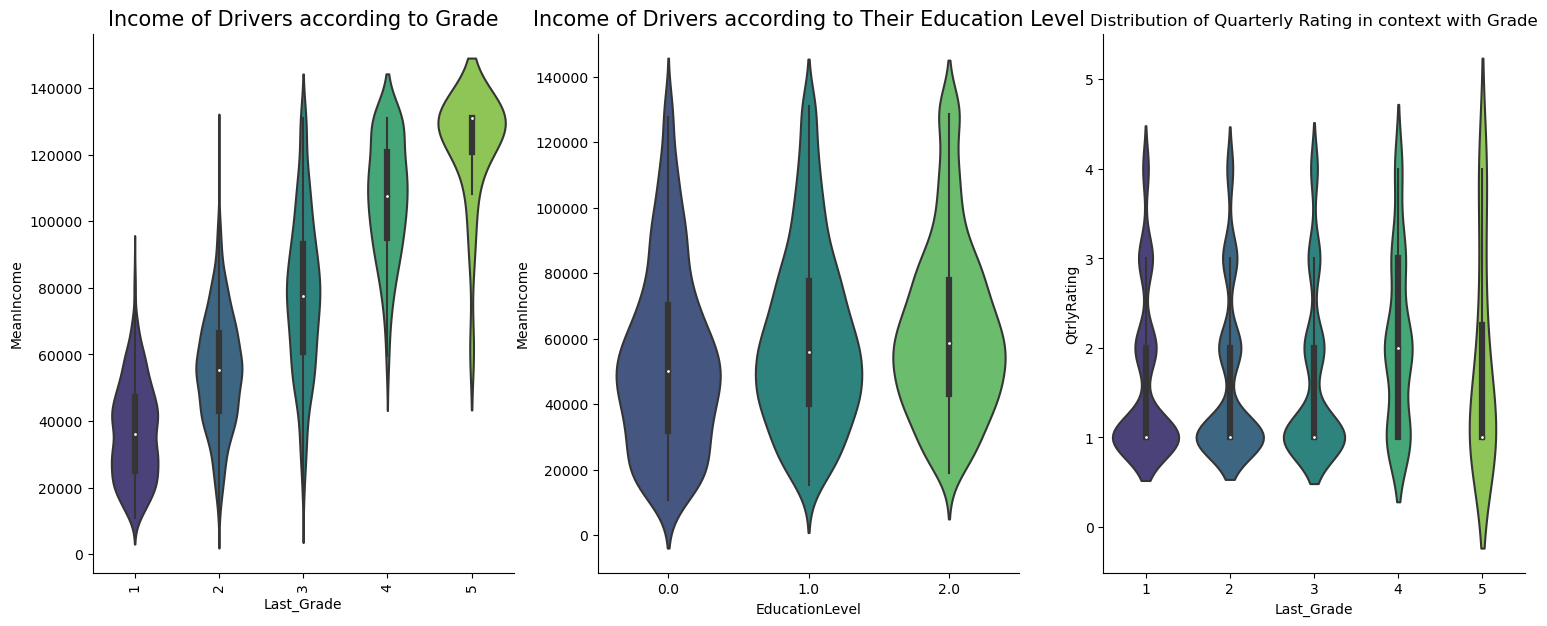

In [49]:
plt.figure(figsize=(25,7))
#plt.subplot(1,4,1)
#sns.violinplot(y=df_agg.Income,x=df_agg['JoiningDesignation'],palette='viridis')
#plt.title('Income of Drivers according to Designation',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,4,2)
sns.violinplot(x=df_agg.Last_Grade,y=df_agg.MeanIncome,palette='viridis')
plt.title('Income of Drivers according to Grade',fontname='Franklin Gothic Medium', fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.violinplot(x=df_agg.EducationLevel,y=df_agg.MeanIncome,palette='viridis')
plt.title('Income of Drivers according to Their Education Level',fontname='Franklin Gothic Medium', fontsize=15)
plt.subplot(1,4,4)
sns.violinplot(x=df_agg['Last_Grade'],y=df_agg["QtrlyRating"],palette='viridis')
plt.title('Distribution of Quarterly Rating in context with Grade')
sns.despine()
sns.despine()
plt.show()


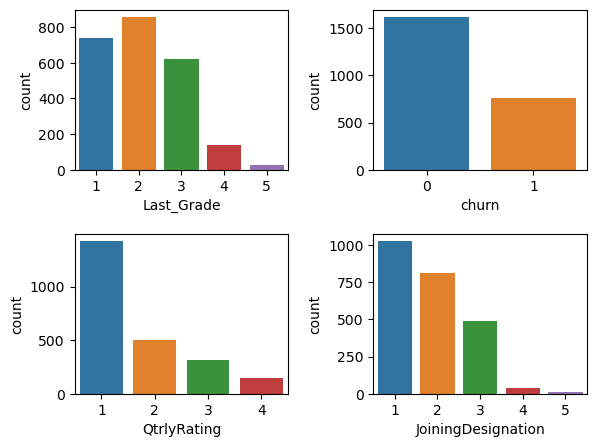

In [50]:
plt.subplot(2,2,1)
sns.countplot(x ='Last_Grade', data = df_agg)

plt.subplot(2,2,2)
sns.countplot(x ='churn', data = df_agg)


plt.subplot(2,2,3)
sns.countplot(x ='QtrlyRating', data = df_agg)

plt.subplot(2,2,4)
sns.countplot(x ='JoiningDesignation', data = df_agg)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()



# Model Building and Preprocessing

In [51]:
df_m =  copy.deepcopy(df_agg)

In [52]:
df_m.drop(columns=['LastWorkingDate', 'JoiningDate'],inplace=True)

In [53]:
df_agg.shape

(2381, 18)

In [54]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver_ID           2381 non-null   int64  
 1   Age                 2381 non-null   float64
 2   Gender              2381 non-null   float64
 3   City                2381 non-null   object 
 4   EducationLevel      2381 non-null   float64
 5   MeanIncome          2381 non-null   float64
 6   JoiningDay          2381 non-null   int64  
 7   JoiningMonth        2381 non-null   object 
 8   JoiningYear         2381 non-null   int64  
 9   JoiningWeekDay      2381 non-null   object 
 10  JoiningQuarter      2381 non-null   object 
 11  JoiningDesignation  2381 non-null   int64  
 12  Last_Grade          2381 non-null   int64  
 13  TotalBusinessValue  2381 non-null   float64
 14  QtrlyRating         2381 non-null   int64  
 15  churn               2381 non-null   int64  
dtypes: flo

In [55]:
df_m.shape

(2381, 16)

In [56]:
df_m.columns

Index(['Driver_ID', 'Age', 'Gender', 'City', 'EducationLevel', 'MeanIncome',
       'JoiningDay', 'JoiningMonth', 'JoiningYear', 'JoiningWeekDay',
       'JoiningQuarter', 'JoiningDesignation', 'Last_Grade',
       'TotalBusinessValue', 'QtrlyRating', 'churn'],
      dtype='object')

# Encoding 
converts all the categorical values into numerical values.

In [57]:
labelenc = LabelEncoder()

for i in ['Driver_ID', 'Age', 'Gender', 'City', 'EducationLevel', 'MeanIncome',
       'JoiningDay', 'JoiningMonth', 'JoiningYear',
       'JoiningWeekDay', 'JoiningQuarter', 'JoiningDesignation', 'Last_Grade',
       'TotalBusinessValue', 'QtrlyRating', 'churn']:
  df_m[i] = labelenc.fit_transform(df_m[i])

# One hot encoding

In [58]:
def get_column_meta_data(dframe):
    t_df_cols = ["Column Name", "Column Type", "No. of Unique Values", "No. of Missing Values"]
    if 'feature_type' in dframe.attrs:
        t_df_cols.append("Feature Type")

    if 'title' in dframe.attrs:
        t_df_cols.append("Title")

    t_data = []

    for col in dframe.columns:
        #try:
        val = [col, dframe[col].dtype, dframe[col].nunique(), dframe[col].isna().sum()]
        #except TypeError:
        #    print("Column name having error : ", col, dframe[col].dtype, dframe[col].nunique())
        if 'feature_type' in dframe.attrs:
            val.append(dframe.attrs['feature_type'][col])
        if 'title' in dframe.attrs:
            val.append(dframe.attrs['title'][col])
        t_data.append(val)

    return pd.DataFrame(t_data, columns = t_df_cols)

In [59]:
get_column_meta_data(df_m)["Column Name"].to_list()

['Driver_ID',
 'Age',
 'Gender',
 'City',
 'EducationLevel',
 'MeanIncome',
 'JoiningDay',
 'JoiningMonth',
 'JoiningYear',
 'JoiningWeekDay',
 'JoiningQuarter',
 'JoiningDesignation',
 'Last_Grade',
 'TotalBusinessValue',
 'QtrlyRating',
 'churn']

In [60]:
l_obj_col = [ "Gender", "City", "EducationLevel", "JoiningMonth", "JoiningWeekDay", "JoiningQuarter",]
df_m[l_obj_col].head().transpose()

,0,1,2,3,4
Gender,0,0,0,0,1
City,15,26,4,28,2
EducationLevel,2,2,2,0,1
JoiningMonth,2,2,2,9,9
JoiningWeekDay,1,1,1,0,0
JoiningQuarter,3,3,3,3,3


In [61]:
df_m.head()

,Driver_ID,Age,Gender,City,EducationLevel,MeanIncome,JoiningDay,JoiningMonth,JoiningYear,JoiningWeekDay,JoiningQuarter,JoiningDesignation,Last_Grade,TotalBusinessValue,QtrlyRating,churn
0,0,13,0,15,2,1248,23,2,5,1,3,0,0,704,1,0
1,1,19,0,26,2,1547,5,2,7,1,3,1,1,10,0,1
2,2,43,0,4,2,1503,6,2,6,1,3,1,1,220,0,0
3,3,15,0,28,0,858,8,9,6,0,3,0,0,44,0,0
4,4,19,1,2,1,1821,30,9,7,0,3,2,2,588,1,1


In [62]:
def get_classification_report(X, model):
    y_pred = model.predict(X_val)
    report = classification_report(y_val, y_pred, output_dict=True)
    return pd.DataFrame(report).transpose()

# KNN Imputation

In [63]:
X = df_m.drop(columns=["churn", "Driver_ID"])
y_actual = np.array(df_m["churn"]).reshape(-1,1)

print(f"X.shape        : {X.shape}")
print(f"y_actual.shape : {y_actual.shape}")

X.shape        : (2381, 14)
y_actual.shape : (2381, 1)


# Scaling

In [64]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [65]:
X.shape

(2381, 14)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print(f"X_train.shape  : {X_train.shape}")
print(f"y_train.shape  : {y_train.shape}")
print(f"X_val.shape    : {X_val.shape}")
print(f"y_val.shape    : {y_val.shape}")
print(f"X_test.shape   : {X_test.shape}")
print(f"y_test.shape   : {y_test.shape}")


X_train.shape  : (1523, 14)
y_train.shape  : (1523, 1)
X_val.shape    : (381, 14)
y_val.shape    : (381, 1)
X_test.shape   : (477, 14)
y_test.shape   : (477, 1)


In [67]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan', weights='uniform', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=3)

In [68]:
print(f"KNN training score   : {knn.score(X_train, y_train)}")
print(f"KNN validation score : {knn.score(X_val, y_val)}")
print(f"KNN test score       : {knn.score(X_test, y_test)}")

KNN training score   : 0.8476690741956664
KNN validation score : 0.7270341207349081
KNN test score       : 0.6834381551362684


#### Classification Report

In [69]:
get_classification_report(X_val, knn)

,precision,recall,f1-score,support
0,0.792727,0.822642,0.807407,265.000000
1,0.556604,0.508621,0.531532,116.000000
accuracy,0.727034,0.727034,0.727034,0.727034
macro avg,0.674666,0.665631,0.669469,381.000000
weighted avg,0.720837,0.727034,0.723414,381.000000


In [70]:
y_train.shape

(1523, 1)

#### Data Balancing

In [71]:
get_classification_report(X_val, knn)

,precision,recall,f1-score,support
0,0.792727,0.822642,0.807407,265.000000
1,0.556604,0.508621,0.531532,116.000000
accuracy,0.727034,0.727034,0.727034,0.727034
macro avg,0.674666,0.665631,0.669469,381.000000
weighted avg,0.720837,0.727034,0.723414,381.000000


In [72]:
class_count = np.unique(y_train.flatten(), return_counts=True)
df_t = pd.DataFrame({
    "Class" : class_count[0],
    "Count" : class_count[1]}
)
print("Before SMOTE")
df_t

Before SMOTE


,Class,Count
0,0,1024
1,1,499


In [73]:
smt=SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [74]:
class_count = np.unique(y_train.flatten(), return_counts=True)
df_t = pd.DataFrame({
    "Class" : class_count[0],
    "Count" : class_count[1]}
)
print("After SMOTE")
df_t

After SMOTE


,Class,Count
0,0,1024
1,1,1024


## Model Building Post Data Balancing

In [75]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [76]:
print(f"DT training score   : {dt_model.score(X_train, y_train)}")
print(f"DT validation score : {dt_model.score(X_val, y_val)}")
print(f"DT test score       : {dt_model.score(X_test, y_test)}")

DT training score   : 0.875
DT validation score : 0.7532808398950132
DT test score       : 0.7610062893081762


## GridSearchCV on Balanced Data

In [77]:
param = {
    "max_depth" : [3, 5, 7, 10, 13],
    "min_samples_split" : [2, 5, 10, 20],
    "min_samples_leaf" : [1, 2, 4, 8],
    "criterion" : ['gini', 'entropy'],
    "max_leaf_nodes" : [10, 50, 100]
}

dt_model = DecisionTreeClassifier(class_weight='balanced')
c = GridSearchCV(dt_model, param, cv = 5, scoring = 'f1')
c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 13],
                         'max_leaf_nodes': [10, 50, 100],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1')

In [78]:
print(f'Best parameters are : {c.best_params_}')
print(f'The score is : {c.best_score_}')

Best parameters are : {'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 100, 'min_samples_leaf': 8, 'min_samples_split': 20}
The score is : 0.8662250277104967


In [79]:
get_classification_report(X_val, c)

,precision,recall,f1-score,support
0,0.886957,0.769811,0.824242,265.000000
1,0.596026,0.775862,0.674157,116.000000
accuracy,0.771654,0.771654,0.771654,0.771654
macro avg,0.741492,0.772837,0.749200,381.000000
weighted avg,0.798379,0.771654,0.778547,381.000000


In [80]:
get_classification_report(X_train, c)

,precision,recall,f1-score,support
0,0.886957,0.769811,0.824242,265.000000
1,0.596026,0.775862,0.674157,116.000000
accuracy,0.771654,0.771654,0.771654,0.771654
macro avg,0.741492,0.772837,0.749200,381.000000
weighted avg,0.798379,0.771654,0.778547,381.000000


In [81]:
get_classification_report(X_test, c)

,precision,recall,f1-score,support
0,0.886957,0.769811,0.824242,265.000000
1,0.596026,0.775862,0.674157,116.000000
accuracy,0.771654,0.771654,0.771654,0.771654
macro avg,0.741492,0.772837,0.749200,381.000000
weighted avg,0.798379,0.771654,0.778547,381.000000


## Building Best Model (Decision Tree)

In [82]:
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=5,
                                  max_leaf_nodes=50,
                                  min_samples_leaf=4,
                                  min_samples_split=10)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=50,
                       min_samples_leaf=4, min_samples_split=10)

In [83]:
print(f"DT training score   : {dt_model.score(X_train, y_train)}")
print(f"DT validation score : {dt_model.score(X_val, y_val)}")
print(f"DT test score       : {dt_model.score(X_test, y_test)}")

DT training score   : 0.8720703125
DT validation score : 0.7532808398950132
DT test score       : 0.7610062893081762


# Ensemble Technique

# Random Forest Classifier¶

In [84]:
param = {
    "n_estimators" : [50,100,150,200],
    "max_depth" : [3, 5, 7, 10, 13]
}

random_forest = RandomForestClassifier(class_weight ='balanced')
c = GridSearchCV(random_forest, param, cv = 5, scoring = 'f1')
c.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 5, 7, 10, 13],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [85]:
print(f'Best parameters are : {c.best_params_}')
print(f'The score is : {c.best_score_}')

Best parameters are : {'max_depth': 10, 'n_estimators': 50}
The score is : 0.8779055106722404


In [86]:
rf_model = RandomForestClassifier(max_depth = 13, n_estimators = 200)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, n_estimators=200)

In [87]:
print(f"DT training score   : {rf_model.score(X_train, y_train)}")
print(f"DT validation score : {rf_model.score(X_val, y_val)}")
print(f"DT test score       : {rf_model.score(X_test, y_test)}")

DT training score   : 1.0
DT validation score : 0.7900262467191601
DT test score       : 0.7777777777777778


        #classification report

In [88]:
get_classification_report(X_test, rf_model)

,precision,recall,f1-score,support
0,0.883817,0.803774,0.841897,265.000000
1,0.628571,0.758621,0.687500,116.000000
accuracy,0.790026,0.790026,0.790026,0.790026
macro avg,0.756194,0.781197,0.764699,381.000000
weighted avg,0.806105,0.790026,0.794889,381.000000


#### ROC Curve & AUC

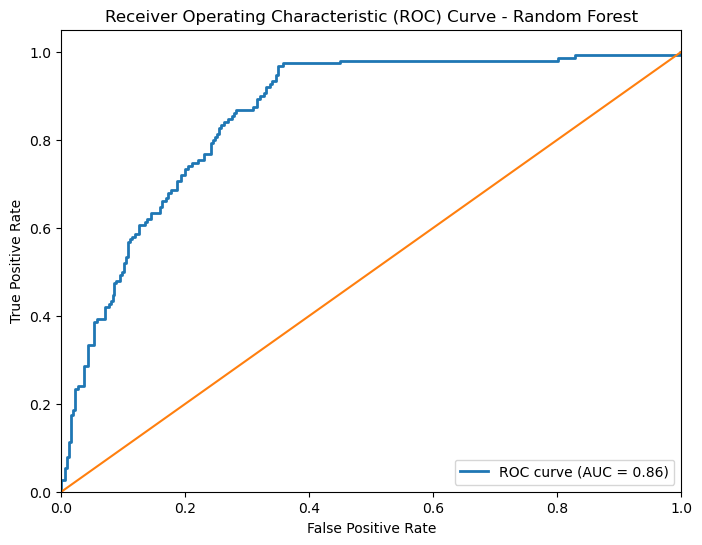

In [89]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probabilities = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = roc_auc_score(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# XG Boost

In [90]:
param = {
    "n_estimators" : [50,100,150,200],
    "max_depth" : [3, 5, 7, 10, 13]
}

xgb_model = xgb.XGBClassifier(class_weight ='balanced')
c = GridSearchCV(xgb_model, param, cv = 5, scoring = 'f1')
c.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, class_weight='balanced',
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 5, 7, 10, 13],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [91]:
print(f'Best parameters are : {c.best_params_}')
print(f'The score is : {c.best_score_}')

Best parameters are : {'max_depth': 10, 'n_estimators': 50}
The score is : 0.8791335732209099


# XG Boost

In [92]:
xgb_model = xgb.XGBClassifier(max_depth = 7, n_estimators = 50)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
print(f"DT training score   : {xgb_model.score(X_train, y_train)}")
print(f"DT validation score : {xgb_model.score(X_val, y_val)}")
print(f"DT test score       : {xgb_model.score(X_test, y_test)}")

DT training score   : 1.0
DT validation score : 0.7900262467191601
DT test score       : 0.7672955974842768


In [94]:
get_classification_report(X_test, xgb_model)

,precision,recall,f1-score,support
0,0.868526,0.822642,0.844961,265.000000
1,0.638462,0.715517,0.674797,116.000000
accuracy,0.790026,0.790026,0.790026,0.790026
macro avg,0.753494,0.769079,0.759879,381.000000
weighted avg,0.798480,0.790026,0.793153,381.000000


#### ROC Curve & AUC

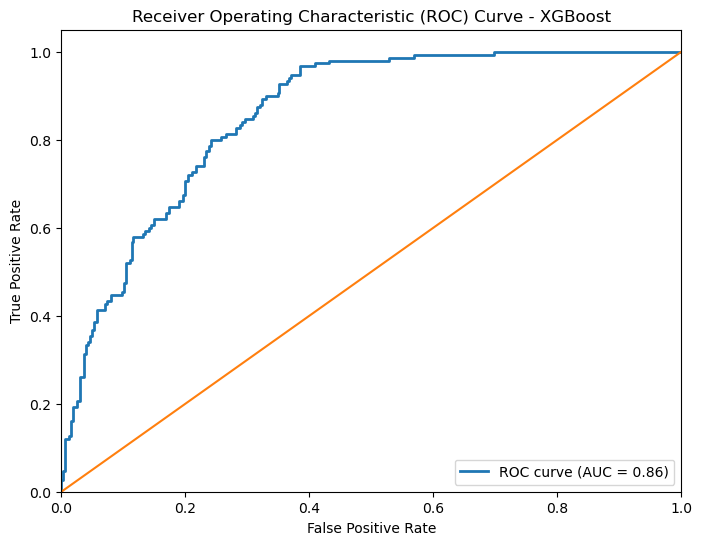

In [95]:
from sklearn.metrics import roc_curve, roc_auc_score
y_probabilities = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)
roc_auc = roc_auc_score(y_test, y_probabilities)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

# Business Recommendation

1) Promote Gender Diversity: OLA should focus on increasing gender diversity among drivers through targeted recruitment, incentives, and support programs aimed at attracting and retaining female drivers. Creating an inclusive work environment will help address the gender gap and enhance retention rates.
2) Offer Education Support: Implement education support programs and career advancement opportunities for drivers of all education levels. This could include workshops, tuition assistance, or partnerships with educational institutions to provide ongoing learning opportunities. Investing in driver development will boost job satisfaction and decrease turnover.
3) Tailor Strategies by Region: Utilize insights on city distribution and turnover rates to develop targeted retention strategies tailored to specific regions. Analyze factors contributing to higher turnover in certain cities and implement initiatives such as improved support services or better incentives to address these challenges.
4)Customize Programs by Demographic: Recognize demographic diversity among drivers and develop retention programs tailored to different age groups and income levels. Provide financial planning assistance, career growth opportunities, or targeted incentives based on drivers' needs.
5)Reward Performance: Design performance-based incentive programs based on quarterly ratings and turnover behavior. Recognize and reward drivers with high ratings, while providing support and resources to those who may need assistance. Incentivizing good performance enhances job satisfaction and loyalty.
6)Conduct Exit Surveys: Conduct thorough exit surveys to gather feedback from departing drivers. Analyze reasons for turnover and use feedback to make targeted improvements in areas such as support, compensation, and work-life balance. Regularly review feedback to address retention issues effectively.
7)Monitor and Analyze Data: Establish a robust data monitoring system to track key metrics related to turnover rates and retention initiatives' effectiveness. Analyze data regularly to identify patterns, evaluate strategies' impact, and make data-driven adjustments to optimize retention efforts.
Implementing these recommendations will help OLA reduce employee turnover, enhance driver satisfaction, and build a stronger and more engaged workforce to support the company's growth.